<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/House Rental.csv")
pd.set_option("display.max_columns",None)
data.head()

<ipython-input-24-c556920f70c3>:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/House Rental.csv")


,listing_id,listing_category,headline,description,included_features,bath_count,bed_count,payment_currency,service_fee_applicable,image_available,pet_policy,monthly_rent,formatted_rent_text,payment_schedule,area_in_sqft,street_address,city,region_code,geo_lat,geo_lon,data_provider,listing_timestamp
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [ ]:
print(data.shape)
data.info()

(99492, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              99492 non-null  int64  
 1   listing_category        99492 non-null  object 
 2   headline                99492 non-null  object 
 3   description             99489 non-null  object 
 4   included_features       83448 non-null  object 
 5   bath_count              99429 non-null  float64
 6   bed_count               99368 non-null  float64
 7   payment_currency        99492 non-null  object 
 8   service_fee_applicable  99492 non-null  object 
 9   image_available         99492 non-null  object 
 10  pet_policy              39068 non-null  object 
 11  monthly_rent            99491 non-null  float64
 12  formatted_rent_text     99491 non-null  object 
 13  payment_schedule        99492 non-null  object 
 14  area_in_sqft            99

In [ ]:
data.describe()

,listing_id,bath_count,bed_count,monthly_rent,area_in_sqft,geo_lat,geo_lon,listing_timestamp
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [ ]:
data.isnull().sum()

,0
listing_id,0
listing_category,0
headline,0
description,3
included_features,16044
bath_count,63
bed_count,124
payment_currency,0
service_fee_applicable,0
image_available,0


In [ ]:
data.isnull().mean()*100

,0
listing_id,0.000000
listing_category,0.000000
headline,0.000000
description,0.003015
included_features,16.125920
bath_count,0.063322
bed_count,0.124633
payment_currency,0.000000
service_fee_applicable,0.000000
image_available,0.000000


<Axes: >

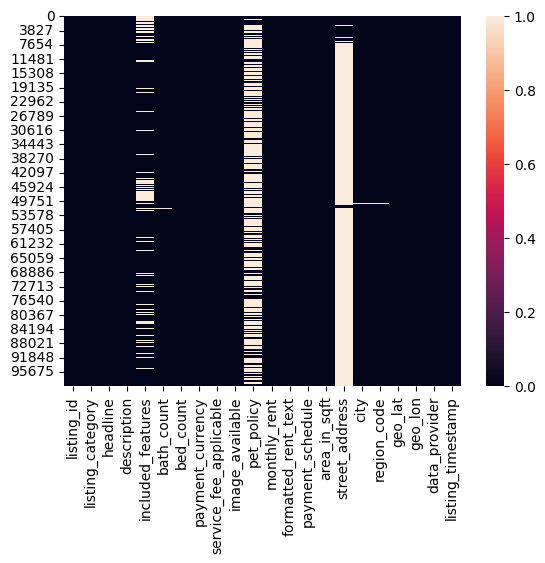

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull(),cbar=True)

In [ ]:
missing_indices = data.index[data['monthly_rent'].isnull() | data['formatted_rent_text'].isnull()]
print("Missing at rows:", list(missing_indices))


Missing at rows: [6864]


In [ ]:
data['description']=data['description'].fillna('')
data['included_features']=data['included_features'].fillna('')
data['bath_count']=data['bath_count'].fillna(data['bath_count'].median())
data['bed_count']=data['bed_count'].fillna(data['bed_count'].median())
data['pet_policy']=data['pet_policy'].fillna('')
data=data.drop('formatted_rent_text',axis=1)
data['monthly_rent']=data['monthly_rent'].fillna(data['monthly_rent'].median())
data=data.drop('street_address',axis=1)
data['city']=data['city'].fillna(data['city'].mode()[0])
data['region_code']=data['region_code'].fillna(data['region_code'].mode()[0])

data['geo_lat'] = data['geo_lat'].fillna(data['geo_lat'].median())
data['geo_lon'] = data['geo_lon'].fillna(data['geo_lon'].median())

In [ ]:
data.isnull().sum()

,0
listing_id,0
listing_category,0
headline,0
description,0
included_features,0
bath_count,0
bed_count,0
payment_currency,0
service_fee_applicable,0
image_available,0


In [ ]:
data.duplicated().sum()

np.int64(84)

In [ ]:
data=data.drop_duplicates()
data.duplicated().sum()

np.int64(0)